#### 1. Импорт библиотек

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from pandas import Series
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import f1_score, recall_score

#### 2. Путь и загрузка данных

In [134]:
train = pd.read_csv('train.csv', encoding='ISO-8859-1', low_memory=False)
test = pd.read_csv("test.csv", encoding='ISO-8859-1', low_memory=False)
submission = pd.read_csv('sample_submission.csv',
                         encoding='ISO-8859-1', low_memory=False)

In [136]:
# Просмотр данных
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [137]:
train.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


Добавилось 5 новых признаков: app_date, score_bki, region_rating, sna, first_time

In [138]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

In [139]:
test.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport
0,74835,22MAR2014,GRD,M,29,Y,Y,0,0,-2.271884,3,50,1,2,50000,1,4,N
1,17527,24JAN2014,SCH,F,39,N,N,5,0,-1.504999,2,50,1,2,5000,4,3,N
2,75683,23MAR2014,UGR,M,50,Y,Y,0,0,-1.691339,1,50,1,2,30000,1,3,Y
3,26883,03FEB2014,SCH,M,56,N,N,0,0,-2.374182,1,40,1,2,17000,1,3,N
4,28862,04FEB2014,GRD,F,38,N,N,0,0,-2.487502,0,80,2,3,120000,1,3,N


#### Описания полей
- client_id - идентификатор клиента

- education - уровень образования

-  sex - пол заемщика

-  age - возраст заемщика

-  car - флаг наличия автомобиля

-  car_type - флаг автомобиля иномарки

-  decline_app_cnt - количество отказанных прошлых заявок

-  good_work - флаг наличия “хорошей” работы

-  bki_request_cnt - количество запросов в БКИ

-  home_address - категоризатор домашнего адреса

-  work_address - категоризатор рабочего адреса

-  income - доход заемщика

-  foreign_passport - наличие загранпаспорта

-  sna - связь заемщика с клиентами банка

-  first_time - давность наличия информации о заемщике

-  score_bki - скоринговый балл по данным из БКИ

-  region_rating - рейтинг региона

-  app_date - дата подачи заявки

-  default - флаг дефолта по кредиту

#### EDA & Feature engineering

In [140]:
# Объединим train и test, чтобы обработать признаки в обоих датасетах.
train['train'] = 1 
test['train'] = 0
data = train.append(test, sort=False).reset_index(drop=True)

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         110148 non-null  int64  
 1   app_date          110148 non-null  object 
 2   education         109670 non-null  object 
 3   sex               110148 non-null  object 
 4   age               110148 non-null  int64  
 5   car               110148 non-null  object 
 6   car_type          110148 non-null  object 
 7   decline_app_cnt   110148 non-null  int64  
 8   good_work         110148 non-null  int64  
 9   score_bki         110148 non-null  float64
 10  bki_request_cnt   110148 non-null  int64  
 11  region_rating     110148 non-null  int64  
 12  home_address      110148 non-null  int64  
 13  work_address      110148 non-null  int64  
 14  income            110148 non-null  int64  
 15  sna               110148 non-null  int64  
 16  first_time        11

In [142]:
df = data.copy()

In [143]:
# Проверяем наличие пропусков в признаках
df.isna().sum()

client_id               0
app_date                0
education             478
sex                     0
age                     0
car                     0
car_type                0
decline_app_cnt         0
good_work               0
score_bki               0
bki_request_cnt         0
region_rating           0
home_address            0
work_address            0
income                  0
sna                     0
first_time              0
foreign_passport        0
default             36349
train                   0
dtype: int64

Пропуски в признаке education могут повляить на модель, поэтому посмотрим на распределение значений в этом признаке. Пропуски в default можно проигнорировать, так как это и есть целевая переменная.

<AxesSubplot:>

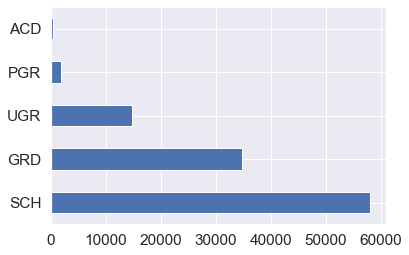

In [144]:
df['education'].value_counts().plot.barh()

In [145]:
# Заменим пропуски часто встречающимся значением - SCH 
df['education'].fillna('SCH', inplace=True) 

In [146]:
# Колонку app_date можно превратить в количество дней от начала наблюдений
df['app_date'] = pd.to_datetime(df['app_date'])
df['app_date'] = df['app_date'].apply(lambda x: (x - df['app_date'].min()).days)

In [147]:
# Теперь можно разделить данные на бинарные, категориальные и числовые
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']
cat_cols = ['education', 'home_address', 'work_address', 'sna', 'first_time']
num_cols = ['app_date', 'age', 'decline_app_cnt', 'score_bki', 'income', 'bki_request_cnt', 'region_rating']

###### 1. Числовые признаки 

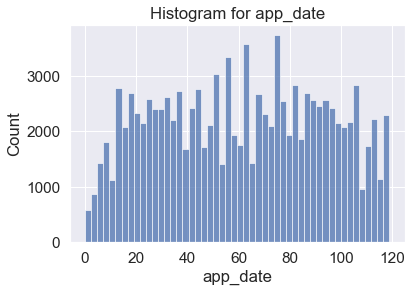

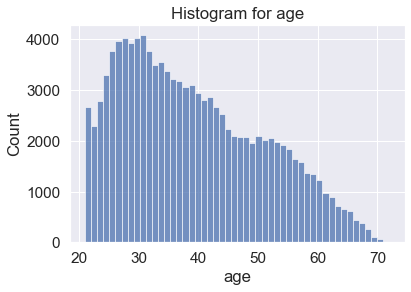

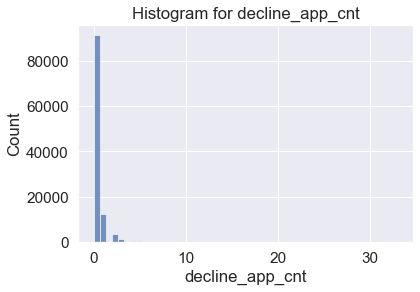

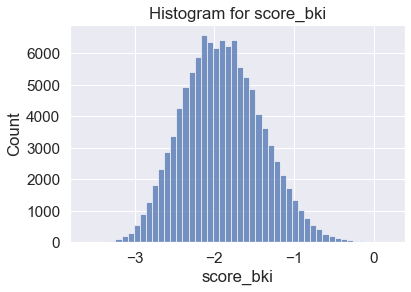

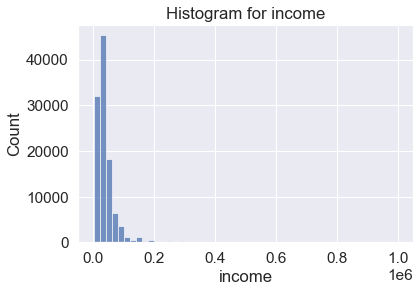

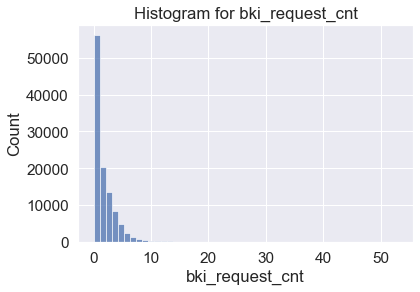

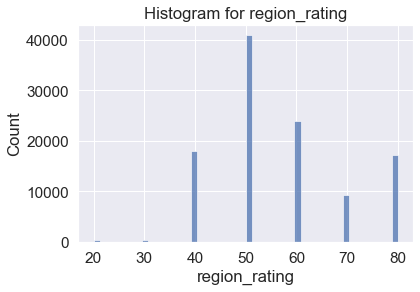

In [148]:
# Посмортим на распределениe числовых признаков

for i in num_cols:
    plt.figure()
    # sns.distplot(df[i][df[i] > 0].dropna(), kde = False, rug=False)
    sns.histplot(df[i], cbar=True, bins = 50)
    plt.title("Histogram for " + i)
    plt.show()

In [149]:
# логарифмируем age, bki_request_cnt, income, 'decline_app_cnt', чтобы сделать из более ревномерными
num_cols_log = ['age', 'income', 'bki_request_cnt', 'decline_app_cnt']
for i in num_cols_log:
    df[i] = df[i].apply(lambda w: np.log(w + 1))

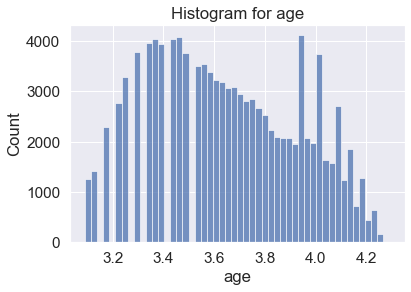

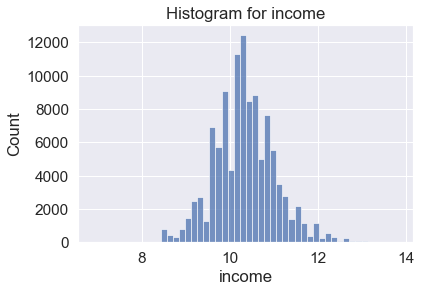

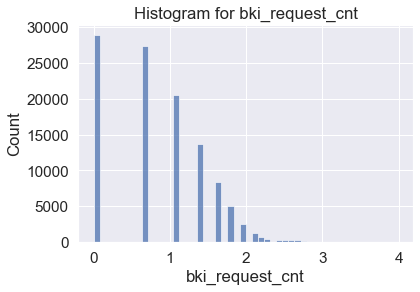

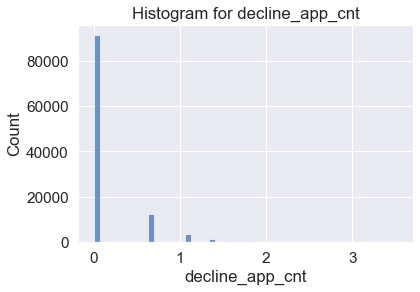

In [150]:
for i in num_cols_log:
    plt.figure()
    sns.histplot(df[i], cbar=True, bins = 50)
    plt.title("Histogram for " + i)
    plt.show()

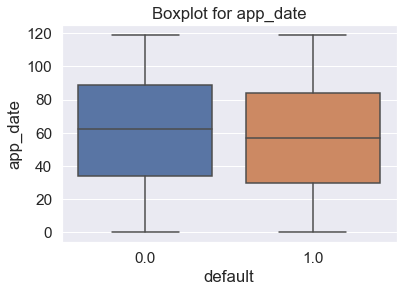

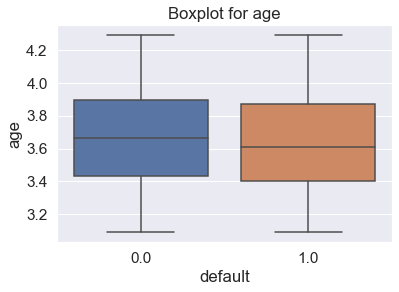

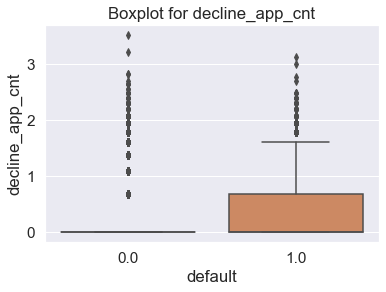

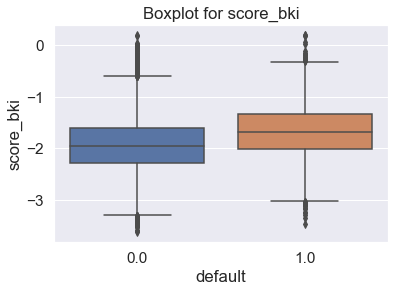

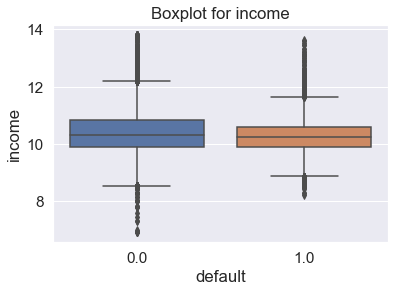

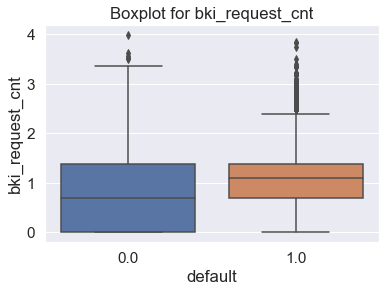

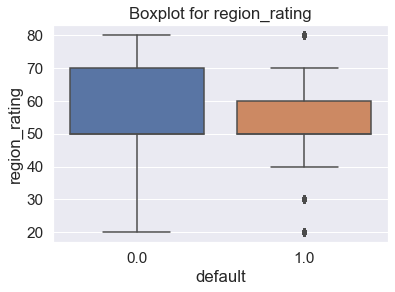

In [151]:
# Посмотрим связь с целевой переменной 
for i in num_cols:
    plt.figure()
    sns.boxplot("default", i, data=df)
    plt.title("Boxplot for " + i)
    plt.show()

По боксплотам можно сделать вывод, что дефолта нет у клиентов постарше;  количество отказанных прошлых заявок выше у клиентов с дефолтом; у клиентов с дефолтом скоринговый балл по данным из БКИ выше; у клиентов без дефолта доход выше; количество запросов в БКИ выше у клиентов с дефолтом.

<AxesSubplot:>

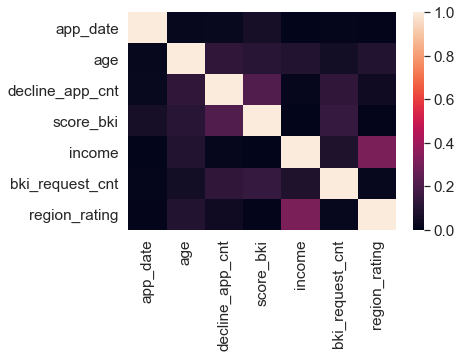

In [152]:
# Оценим корреляцию Пирсона для непрерывных переменных по формуле:
sns.heatmap(df[num_cols].corr().abs(), vmin=0, vmax=1)

Корреляция между признакми слабая.

<AxesSubplot:>

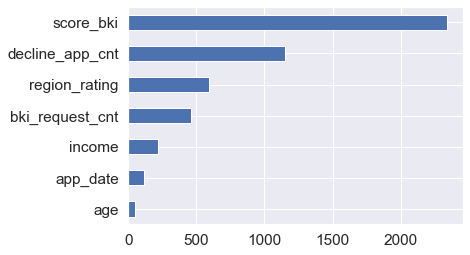

In [153]:
# Значимость непрерывных переменных по ANOVA F test
df_temp = df[df['train']==1]
imp_num = pd.Series(f_classif(df_temp[num_cols], df_temp['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

По версии ANOVA самое большое влияние на целевую переменную оказывает score_bki.

###### 2.Категориальные признаки 

Посмотрим на взаимосвзяь между дефолтом и категориальных значений

<AxesSubplot:xlabel='education', ylabel='default'>

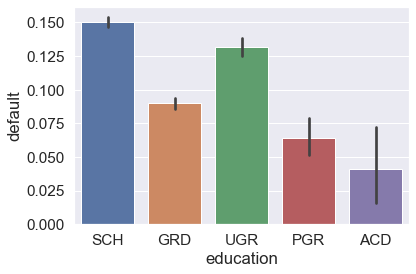

In [154]:
sns.barplot(x='education', y="default", data=df[['education', 'default']])

<AxesSubplot:xlabel='home_address', ylabel='default'>

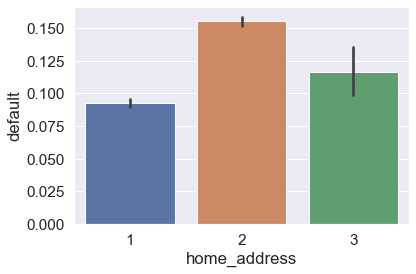

In [155]:
sns.barplot(x='home_address', y="default", data=train[['home_address', 'default']])

<AxesSubplot:xlabel='work_address', ylabel='default'>

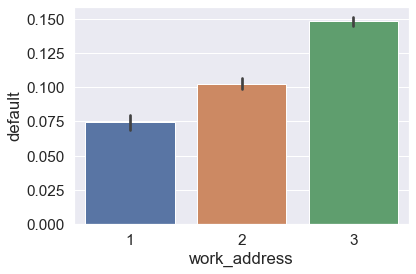

In [156]:
sns.barplot(x='work_address', y="default", data=train[['work_address', 'default']])

<AxesSubplot:xlabel='sna', ylabel='default'>

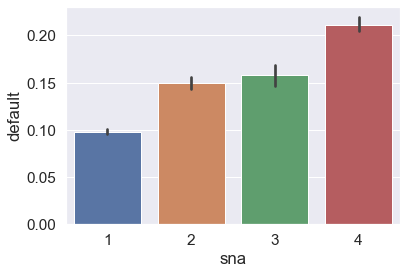

In [157]:
sns.barplot(x='sna', y="default", data=train[['sna', 'default']])

<AxesSubplot:xlabel='first_time', ylabel='default'>

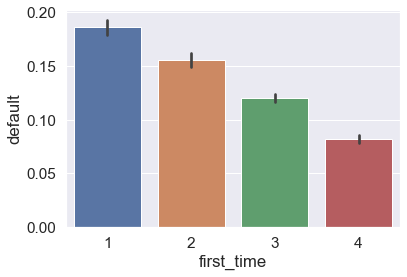

In [158]:
sns.barplot(x='first_time', y="default", data=train[['first_time', 'default']])

По барплоту образования, понятно, что у людей со средним образованием чаще есть дефолт. Чтобы сделать конкретные выводы по другим признакам, нужна информация по каждой категории.

In [159]:
# Преобразуем категориальные признаки (education) в числовые
label_encoder = LabelEncoder()
df['education'] = label_encoder.fit_transform(df['education'])

###### 3.Бинарные признаки

<AxesSubplot:xlabel='first_time', ylabel='default'>

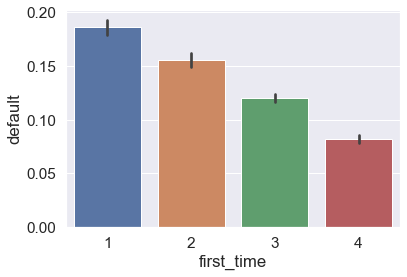

In [160]:
sns.barplot(x='first_time', y="default", data=train[['first_time', 'default']])

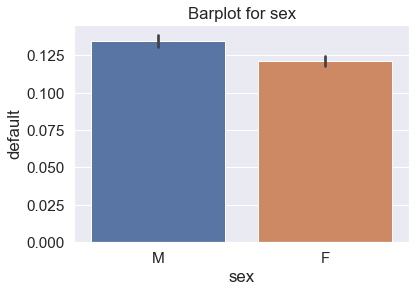

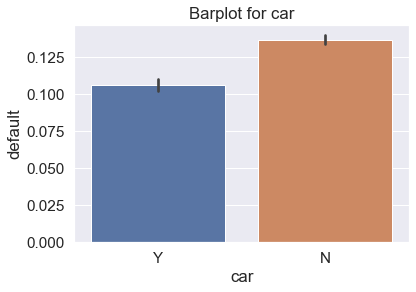

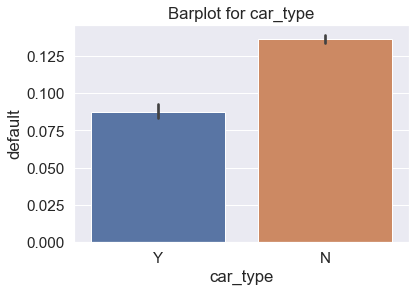

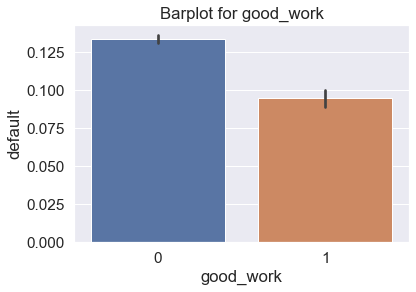

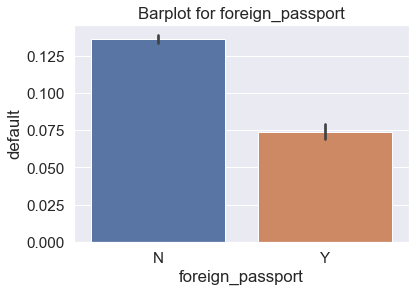

In [161]:
# Посмотрим связь с целевой переменной 
for i in bin_cols:
    plt.figure()
    sns.barplot(x=i, y="default", data=df[[i, 'default']])
    plt.title("Barplot for " + i)
    plt.show()

Дефолт чаще есть у клиентов мужчин, у тех у кого нет машины, у людей с плохой работой и у клиентов без паспорта.

<AxesSubplot:>

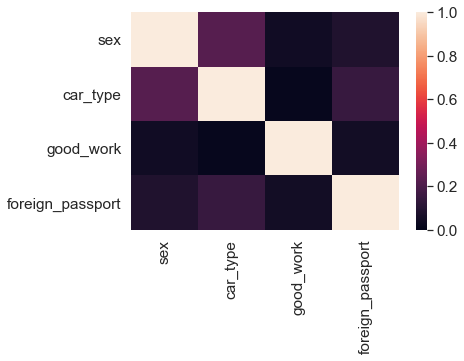

In [175]:
sns.heatmap(df[bin_cols].corr().abs(), vmin=0, vmax=1)

Сильная корреляция у машин и тип машин, удалим один из признаков.

In [163]:
df.drop(['car'], axis=1, inplace=True)
bin_cols.remove('car')

In [164]:
# Преобразуем бинарные признаки в числовые
for col in bin_cols:
    df[col] = label_encoder.fit_transform(df[col])

<AxesSubplot:>

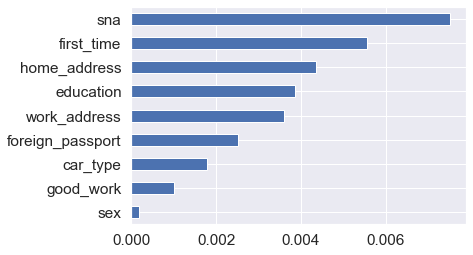

In [165]:
# Значимость непрерывных переменных по ANOVA F test
df_tm = df[df['train']==1]
imp_cat = Series(mutual_info_classif(df_tm[bin_cols + cat_cols], df_tm['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

По версии ANOVA самое большое влияние на целевую переменную оказывает sna.

#### Построение модели

In [166]:
train_data = df.query('train == 1').drop(['train'], axis=1)
test_data = df.query('train == 0').drop(['train'], axis=1)

In [167]:
# Выводим категориальные переменные в 0 или 1.
X_cat = OneHotEncoder(sparse=False).fit_transform(train_data[cat_cols].values)

In [168]:
# Стандартизация числовых переменных:
X_num = StandardScaler().fit_transform(train_data[num_cols].values)

In [169]:
# Объединяем
X = np.hstack([X_num, train_data[bin_cols].values, X_cat])
Y = train_data['default'].values

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

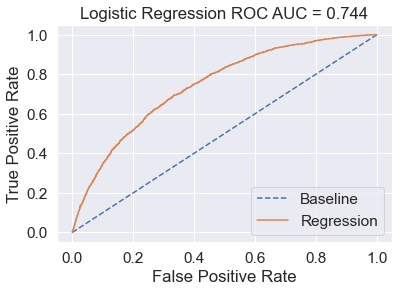

In [171]:
model = LogisticRegression()
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)
probs = probs[:,1]

fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

<AxesSubplot:>

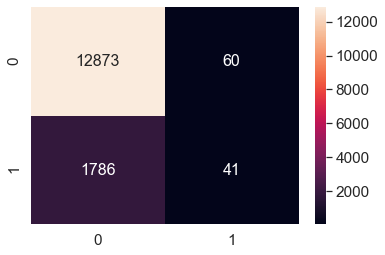

In [172]:
# Confusion matrix
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4) 
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}, fmt='g')

In [173]:
# расчитаем F1 score
f1 = f1_score(y_test, y_pred)
print('F1-score: {:.2f}'.format(f1))

# расчитаем recall
recall = recall_score(y_test, y_pred)
print('Recall: {:.2f}'.format(recall))

F1-score: 0.04
Recall: 0.02


Из матрицы и по метрике Recall можно сделать вывод, что модель не угадывает клиентов с дефолтом.

In [176]:
# Добавим типы регуляризации
penalty = ['l1', 'l2']

# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

# Создадим гиперпараметры
hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression()
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

Лучшее Penalty: l2
Лучшее C: 2.7825594022071245


<AxesSubplot:>

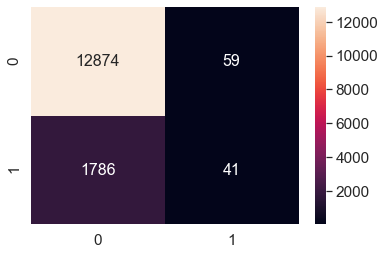

In [177]:
# вторая модель на параметрах после первой оптимизации
model_2 = LogisticRegression(C=100, penalty= 'l2', solver='liblinear')
model_2.fit(X_train, y_train)

y_pred_prob = model_2.predict_proba(X_test)[:,1]
y_pred = model_2.predict(X_test)
conf_2 = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4) 
sns.heatmap(conf_2, annot=True, annot_kws={"size": 16}, fmt='g')

In [178]:
# расчитаем F1 score
f1 = f1_score(y_test, y_pred)
print('F1-score: {:.2f}'.format(f1))

# расчитаем recall
recall = recall_score(y_test, y_pred)
print('Recall: {:.2f}'.format(recall))

F1-score: 0.04
Recall: 0.02


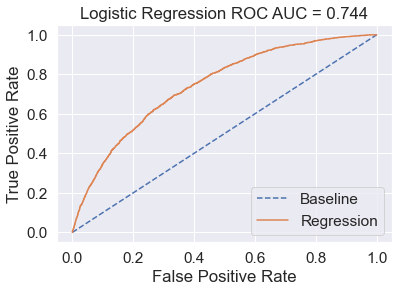

In [188]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [184]:
X_cat_test = OneHotEncoder(sparse = False).fit_transform(test_data[cat_cols].values)
X_num_test = StandardScaler().fit_transform(test_data[num_cols].values)

X_test2 = np.hstack([X_num_test, test_data[bin_cols].values, X_cat_test])
y_probs = model_2.predict_proba(X_test2)[:,1]

In [189]:
# предскажем данные на тестовой модели
test_data['default'] = y_probs
submission = test_data[['client_id', 'default']]
submission.to_csv("submission.csv", index=False)


In [190]:
submission

,client_id,default
73799,74835,0.039526
73800,17527,0.358490
73801,75683,0.059577
73802,26883,0.094842
73803,28862,0.027566
...,...,...
110143,83775,0.323740
110144,106254,0.017950
110145,81852,0.327058
110146,1971,0.211082
